# Feature Selection and Feature Engineering

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif


In [4]:
df = pd.read_csv('synthetic_dataset.csv')
df.head()

,ID,Age,Salary,Experience,Education_Level,City,Has_Car,House_Ownership,Loan_Amount,Defaulted
0,1,56,38392,4,PhD,Los Angeles,1,Mortgaged,33710,0
1,2,46,60535,33,PhD,Los Angeles,1,Rented,20485,0
2,3,32,108603,5,Bachelor,New York,0,Mortgaged,49482,1
3,4,25,82256,21,High School,Houston,0,Owned,25652,0
4,5,38,119135,10,Bachelor,Los Angeles,1,Rented,9748,1


## Feature Engineering

In [6]:
df = pd.get_dummies(df, columns=['Education_Level', 'City', 'House_Ownership'], drop_first=True)
df.head()

,ID,Age,Salary,Experience,Has_Car,Loan_Amount,Defaulted,Education_Level_High School,Education_Level_Master,Education_Level_PhD,City_Houston,City_Los Angeles,City_New York,House_Ownership_Owned,House_Ownership_Rented
0,1,56,38392,4,1,33710,0,False,False,True,False,True,False,False,False
1,2,46,60535,33,1,20485,0,False,False,True,False,True,False,False,True
2,3,32,108603,5,0,49482,1,False,False,False,False,False,True,False,False
3,4,25,82256,21,0,25652,0,True,False,False,True,False,False,True,False
4,5,38,119135,10,1,9748,1,False,False,False,False,True,False,False,True


In [8]:
scaler = StandardScaler()
df[['Age', 'Salary', 'Experience', 'Loan_Amount']] = scaler.fit_transform(df[['Age', 'Salary', 'Experience', 'Loan_Amount']])
df.head()

,ID,Age,Salary,Experience,Has_Car,Loan_Amount,Defaulted,Education_Level_High School,Education_Level_Master,Education_Level_PhD,City_Houston,City_Los Angeles,City_New York,House_Ownership_Owned,House_Ownership_Rented
0,1,1.487884,-1.520253,-1.416687,1,0.411355,0,False,False,True,False,True,False,False,False
1,2,0.665394,-0.666235,1.073248,1,-0.617749,0,False,False,True,False,True,False,False,True
2,3,-0.486092,1.187666,-1.330828,0,1.638654,1,False,False,False,False,False,True,False,False
3,4,-1.061835,0.171507,0.042930,0,-0.215678,0,True,False,False,True,False,False,True,False
4,5,0.007402,1.593868,-0.901528,1,-1.453249,1,False,False,False,False,True,False,False,True


## Feature Selection

In [10]:
X = df.drop(columns=['ID', 'Defaulted'])
y = df['Defaulted']

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
selected_features

Index(['Salary', 'Experience', 'Has_Car', 'City_Houston',
       'House_Ownership_Rented'],
      dtype='object')

In [12]:
df_selected = df[['Defaulted'] + list(selected_features)]
df_selected.head()

,Defaulted,Salary,Experience,Has_Car,City_Houston,House_Ownership_Rented
0,0,-1.520253,-1.416687,1,False,False
1,0,-0.666235,1.073248,1,False,True
2,1,1.187666,-1.330828,0,False,False
3,0,0.171507,0.042930,0,True,False
4,1,1.593868,-0.901528,1,False,True


df = pd.get_dummies(df, columns=['Education_Level', 'City', 'House_Ownership'], drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Feature Correlation Matrix")
plt.show()

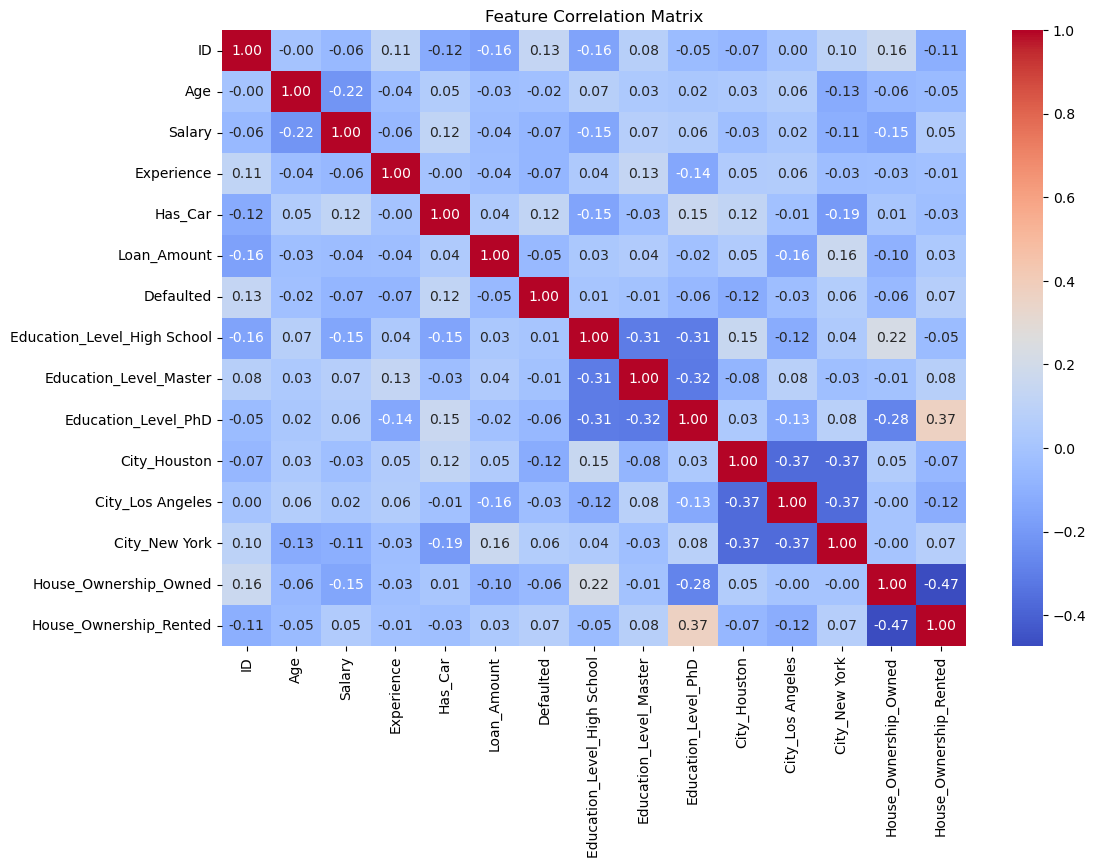

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Feature Correlation Matrix")
plt.show()

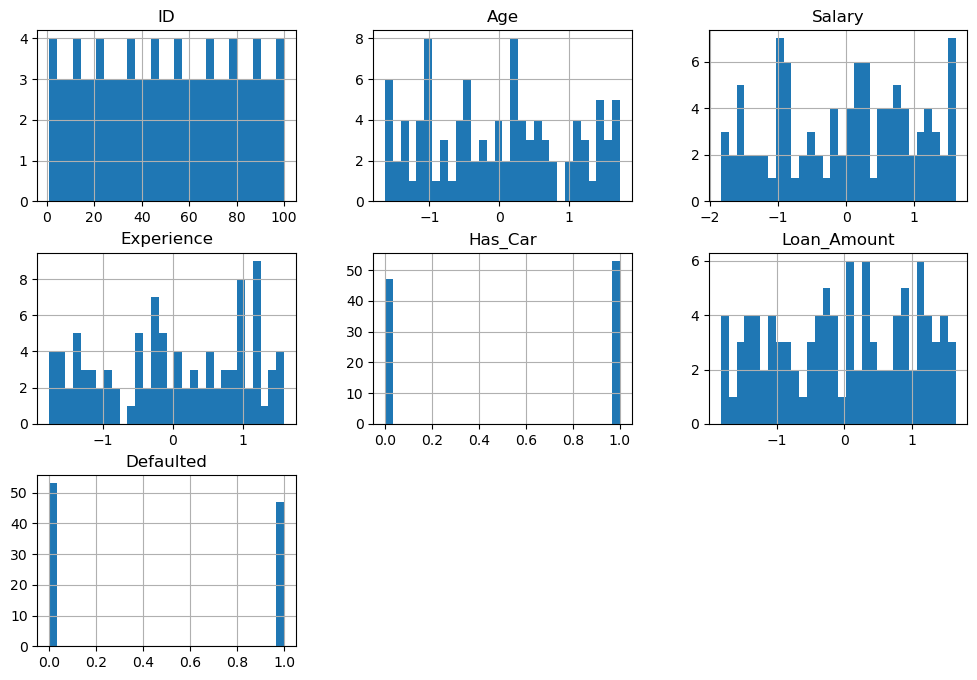

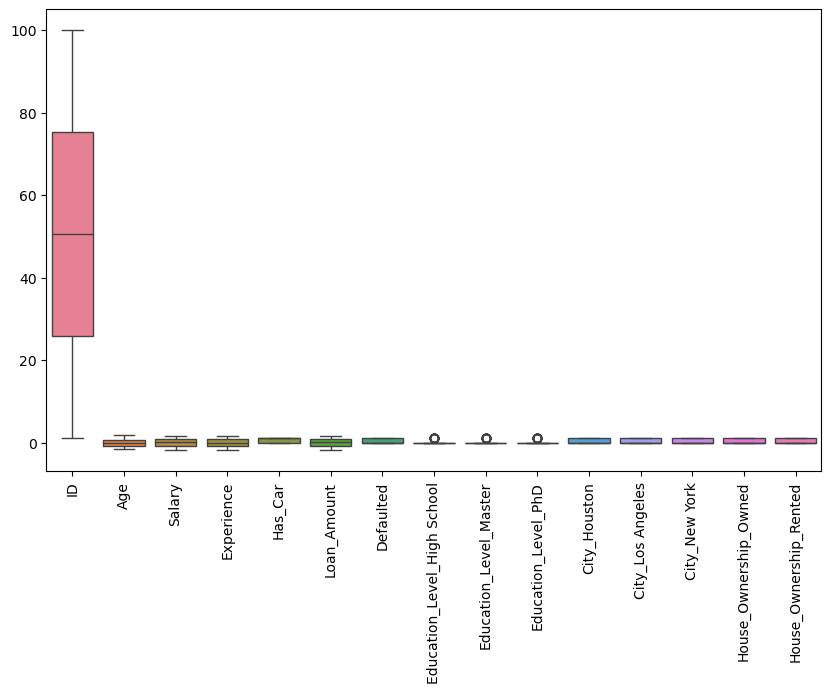

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(figsize=(12, 8), bins=30)
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [29]:
# from scipy.stats import zscore

# df_no_outliers = df[(np.abs(zscore(df.select_dtypes(include=['number']))) < 3).all(axis=1)]


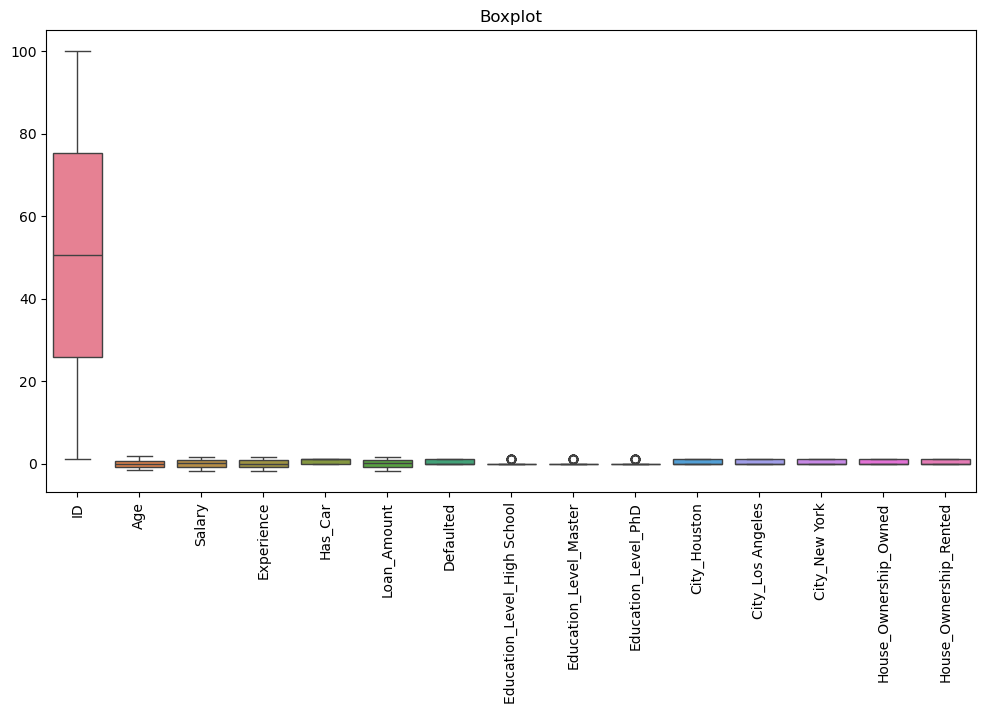

In [39]:
num_cols = ['Age', 'Salary', 'Experience', 'Loan_Amount']

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned = df[~((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned)
plt.xticks(rotation=90)
plt.title("Boxplot")
plt.show()

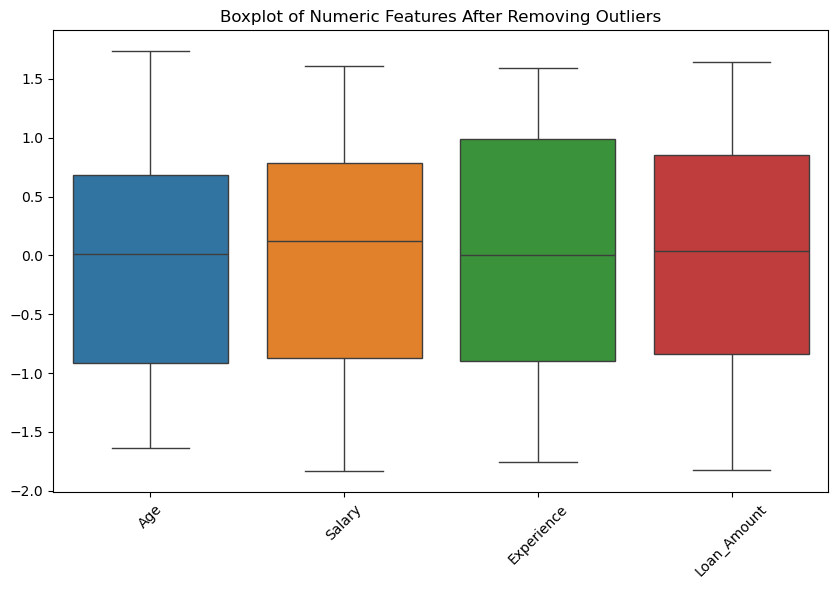

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = ["Age", "Salary", "Experience", "Loan_Amount"]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Features After Removing Outliers")
plt.xticks(rotation=45)
plt.show()
